In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("/Users/lorenzofamiglini/Downloads/total_period_time_eat.csv")

In [88]:
df.head()

,taxi_id,date_time,long,lat,district,period,time_to_eat
0,1,2008-02-02 15:36:08,116.51172,39.92123,Chaoyang,Afternoon,0
1,1,2008-02-02 15:46:08,116.51135,39.93883,Chaoyang,Afternoon,0
2,1,2008-02-02 15:46:08,116.51135,39.93883,Chaoyang,Afternoon,0
3,1,2008-02-02 15:56:08,116.51627,39.91034,Chaoyang,Afternoon,0
4,1,2008-02-02 16:06:08,116.47186,39.91248,Chaoyang,Afternoon,0


In [ ]:
# Set time as index

In [ ]:
df2 = df.copy()
df2['datetime'] = pd.to_datetime(df2['date_time'])
df2 = df2.set_index('datetime')
df2.drop(['date_time'], axis=1, inplace=True)

In [ ]:
df2.head()

# Data exploration

In [7]:
hou = pd.DataFrame(df2.resample('H')["taxi_id"].count()).reset_index()

In [8]:
hou['new_date'] = [d.date() for d in hou['datetime']]
hou['new_time'] = [d.time() for d in hou['datetime']]

In [9]:
hou.groupby("new_date")["taxi_id"].max()

new_date
2008-02-02    169036
2008-02-03    174167
2008-02-04    173282
2008-02-05    170617
2008-02-06    141734
2008-02-07    131241
2008-02-08    157547
Name: taxi_id, dtype: int64

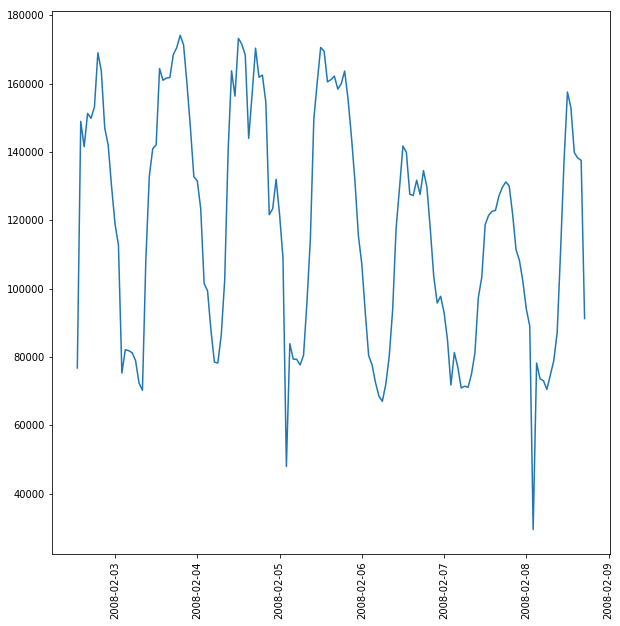

In [16]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(10, 10))
plt.plot(hou["datetime"],hou["taxi_id"])
plt.xticks(rotation='vertical')
plt.show()

# Data prep:

In [32]:
df3 = df2.copy()

In [33]:
df3["app"] = df3.index

In [34]:
#Needs improvements
df3['new_date'] = [d.date() for d in df3['app']]
df3['new_time'] = [d.time() for d in df3['app']]

In [35]:
df3.drop(['app'], axis=1, inplace=True)

In [37]:
#df3 = df3.reset_index()
#df3 = df3.set_index(["district", "new_time"])

In [54]:
df3.drop(["long","lat"], axis = 1, inplace = True)

In [100]:
df3 = df3.groupby([pd.Grouper(level='datetime', freq='30Min'),
               "district"])[['taxi_id']].count().reset_index()

__Feature's creation:__ 

In [101]:
def day_period(time):
    hour = time.hour
    if(0<=hour<=5 or hour>=23):
        return "Night"
    if(6<=hour<=12):
        return "Morning"
    if(12<hour<=18):
        return "Afternoon"
    if(18<hour<23):
        return "Evening"
    
def is_time_to_eat(time):
    hour = time.hour
    if(6<=hour<=9 or 12<=hour<=14 or 18<=hour<=21):
        return 1 #yes
    else:
        return 0 #no

In [102]:
df3.date_time = pd.to_datetime(df3.datetime,format = '%Y-%m-%d %X')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [103]:
df3["period"] = df3.date_time.apply(day_period)
df3["time_to_eat"] = df3.date_time.apply(is_time_to_eat)

In [105]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5346 entries, 0 to 5345
Data columns (total 5 columns):
datetime       5346 non-null datetime64[ns]
district       5346 non-null object
taxi_id        5346 non-null int64
period         5346 non-null object
time_to_eat    5346 non-null int64
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 208.9+ KB


In [106]:
df3.head(20)

,datetime,district,taxi_id,period,time_to_eat
0,2008-02-02 13:30:00,Changping,338,Afternoon,1
1,2008-02-02 13:30:00,Chaoyang,17537,Afternoon,1
2,2008-02-02 13:30:00,Chongwen,8366,Afternoon,1
3,2008-02-02 13:30:00,Daxing,626,Afternoon,1
4,2008-02-02 13:30:00,Dongcheng,11161,Afternoon,1
5,2008-02-02 13:30:00,Fangshan,409,Afternoon,1
6,2008-02-02 13:30:00,Fengtai,7391,Afternoon,1
7,2008-02-02 13:30:00,Haidian,9048,Afternoon,1
8,2008-02-02 13:30:00,Huairou,75,Afternoon,1
9,2008-02-02 13:30:00,Mentougou,133,Afternoon,1
